# SUPPORT VECTOR MACHNE(SVM)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
import sklearn.tree as tr


# Load the dataset
water = pd.read_csv('waterQuality1.csv')  # Assuming the dataset is stored in a CSV file

# Data exploration and preprocessing
print(water.head())  # To see the first few rows of the dataset
print(water.describe())  # To get statistical information about the dataset


   aluminium  ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65     9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32    21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01    14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36    11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92    24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  

In [2]:
# Check for missing values
print("Missing values:\n",water.isnull().sum())

Missing values:
 aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [3]:
positive = water[water['is_safe'].isin([1])]
negative = water[water['is_safe'].isin([0])]

print("Length of data:\n",len(water))
print("Positive_result:\n",len(positive))
print("Negative_result:\n",len(negative))

Length of data:
 5999
Positive_result:
 898
Negative_result:
 5101


In [4]:
#split train and test data
X = water.drop("is_safe", axis=1).values
y = water["is_safe"].values
x_tr, x_tes, y_tr, y_tes = ms.train_test_split(X,y ,test_size=0.25, random_state=124)

print('X_train shape : {}'.format(x_tr.shape))
print('X_test shape : {}'.format(x_tes.shape))
print('y_train shape : {}'.format(y_tr.shape))
print('y_test shape : {}'.format(y_tes.shape))

X_train shape : (4499, 20)
X_test shape : (1500, 20)
y_train shape : (4499,)
y_test shape : (1500,)


In [5]:
#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_tr = sc_X.fit_transform(x_tr)
x_tes = sc_X.transform(x_tes)

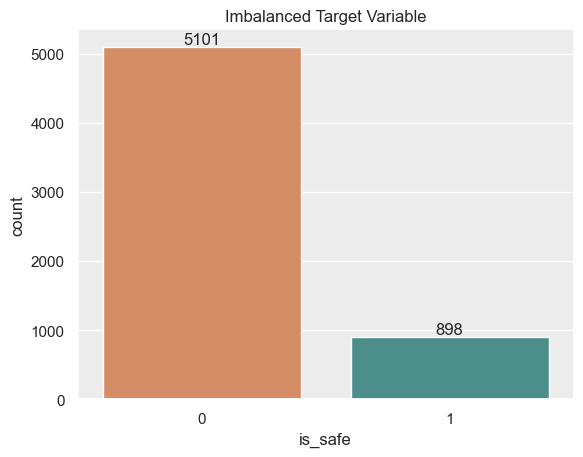

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

list_of_num_features = water.loc[:, water.columns != 'is_safe']
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'})

# Create the countplot with white grid and specified background color
ax = sns.countplot(x="is_safe", data=water, palette=palette_features)
plt.title("Imbalanced Target Variable")
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()

In [7]:
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.over_sampling import RandomOverSampler

# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(x_tr, y_tr)
# summarize class distribution
print(Counter(y))


Counter({0: 5101, 1: 898})
Counter({0: 3822, 1: 3822})


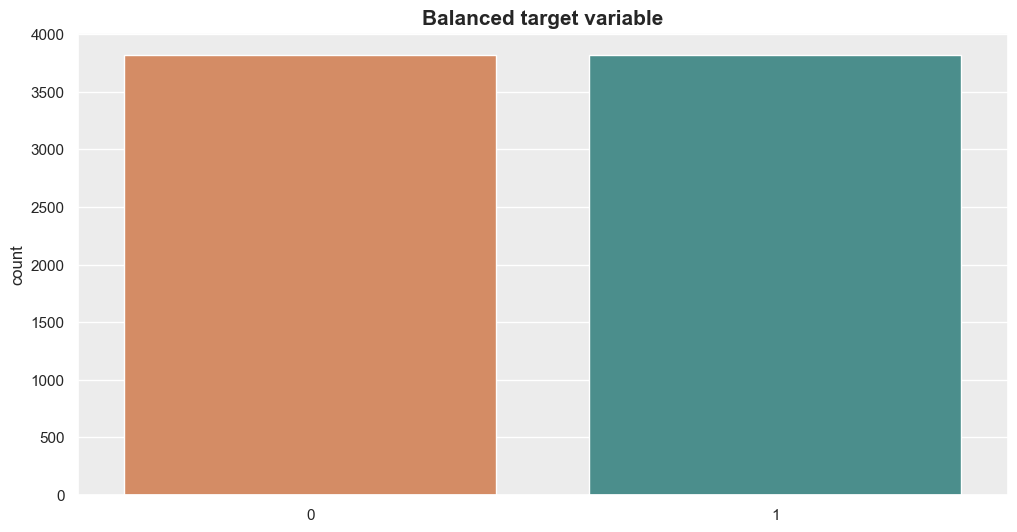

In [8]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) #background color of plot
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', ha='center')
ax = sns.countplot(x=y, data=water, palette=palette_features)
plt.show()

In [9]:
#X = water.drop("is_safe", axis=1).values
#y = water["is_safe"].values
x_tr, x_tes, y_tr, y_tes = ms.train_test_split(X,y ,test_size=0.25, random_state=124)

print('X_train shape : {}'.format(x_tr.shape))
print('X_test shape : {}'.format(x_tes.shape))
print('y_train shape : {}'.format(y_tr.shape))
print('y_test shape : {}'.format(y_tes.shape))

#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_tr = sc_X.fit_transform(x_tr)
x_tes = sc_X.transform(x_tes)

X_train shape : (5733, 20)
X_test shape : (1911, 20)
y_train shape : (5733,)
y_test shape : (1911,)


In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

[0.923600209314495, 0.9431362288505145, 0.9515088086516658, 0.9584859584859585, 0.9635443921158207, 0.9677306820163963, 0.9687772544915402]
[0.9037153322867608, 0.9230769230769231, 0.9262166405023547, 0.9288330716902146, 0.9377289377289377, 0.9403453689167975, 0.9392987964416536]
[1, 2, 3, 4, 5, 6, 7]


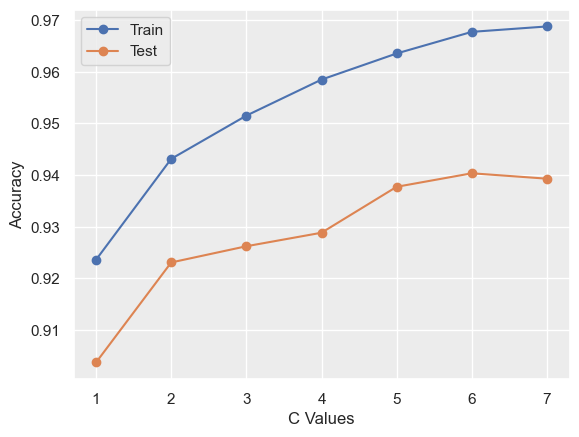

Training Accuracy (SVM): 0.9829059829059829
Testing Accuracy (SVM): 0.9581371009942439


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
import sklearn.model_selection as ms
from sklearn.svm import SVC

Acc_tr_svm = []
Acc_tes_svm = []
C_values = []

for i in range(1, 8):
    svm = SVC(C=i, kernel='poly')
    svm.fit(x_tr, y_tr)
    Acc_tr_svm.append(svm.score(x_tr, y_tr))
    Acc_tes_svm.append(svm.score(x_tes, y_tes))
    C_values.append(i)
print(Acc_tr_svm)
print(Acc_tes_svm)
print(C_values)
# Visualize Accuracy
plt.figure()
plt.plot(C_values, Acc_tr_svm, label='Train', marker='o')
plt.plot(C_values, Acc_tes_svm, label='Test', marker='o')
plt.xlabel('C Values')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Calculate training and testing accuracy for the last SVM model (C=3)
svm = SVC(C=7, kernel='rbf')
svm.fit(x_tr, y_tr)
train_accuracy_svm = svm.score(x_tr, y_tr)
test_accuracy_svm = svm.score(x_tes, y_tes)
print("Training Accuracy (SVM):", train_accuracy_svm)
print("Testing Accuracy (SVM):", test_accuracy_svm)


In [30]:

# Print classification report
from sklearn.metrics import accuracy_score, classification_report

clf_svm = SVC(kernel='poly', gamma='scale', degree=4, C=1)
cross_val_svm = cross_val_score(clf_svm, x_tes, y_tes, cv=5)
(cross_val_svm * 100).mean()

clf_svm.fit(x_tr, y_tr)
predictions = clf_svm.predict(x_tes)

# Calculate accuracy
accuracy = accuracy_score(y_tes, predictions)
print("Accuracy For SVM:", accuracy)

# Print classification report
print("\nClassification Report for SVM:")
print(classification_report(y_tes, predictions))



Accuracy For SVM: 0.902145473574045

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       919
           1       0.85      0.98      0.91       992

    accuracy                           0.90      1911
   macro avg       0.92      0.90      0.90      1911
weighted avg       0.91      0.90      0.90      1911



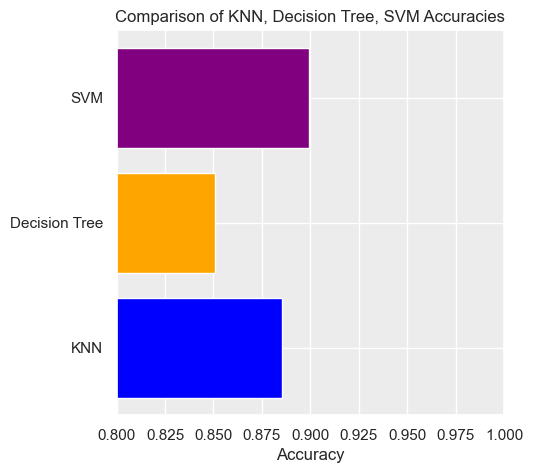

In [32]:
#model accuracy Comparison 
import matplotlib.pyplot as plt

# Accuracy values for SVM, KNN, and Decision Tree
svm_accuracy = 0.8995290423861853
knn_accuracy = 0.885400313971742  
decision_tree_accuracy = 0.8508634222919937  

# Bar chart
models = ['KNN', 'Decision Tree', 'SVM']
accuracies = [knn_accuracy, decision_tree_accuracy, svm_accuracy]

plt.figure(figsize=(5, 5))
plt.barh(models, accuracies, color=['blue', 'orange', 'purple'])
plt.xlim(0.8, 1.0) 
plt.xlabel('Accuracy')
plt.title('Comparison of KNN, Decision Tree, SVM Accuracies')
plt.show()
